# Hierarchical clustering: Reconstructing evolutionary relationship between species

Hierarchical clustering algorithms have a natural applicability for questions of 


Certain problems may arise  with inherent hierarchical structure and naturally lend themselves to hierarchical clustering. Ford and VolksWagen are cars, Boeing are planes, both planes and cars are motorized vehicles. Biological species is another great example: the tree of life is essentially a hierarchical heap of cluster, and modern reconstructions of evolutionary kinship is done using the basic technique you will learn here.  

Once again we don't need labeled data, as hierarchical clustering is just another example of unsupervised learning.

In [276]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

## Basic concept
Here we demonstrate the basic of hierarchical clustering using a random dataset. 

Provided N data points, we first have to find a measure of similarity or distance between each observation. For continuous vectors, this is just the distance between them in feature space.  

In [266]:
# make a random data set. Scikit-learns make_blobs is a nice functionality.
stds = [1.5, 1, .8]
X, y = make_blobs(100, centers=3, random_state=11, cluster_std=stds)

The ground truth versus what the computer sees before any clustering has been done.


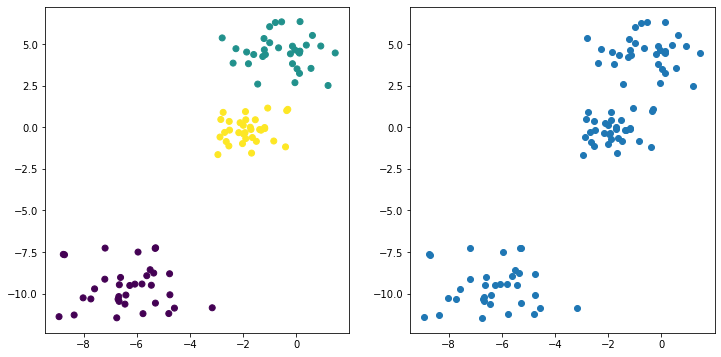

In [267]:
print("The ground truth versus what the computer sees before any clustering has been done.")

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.scatter(X[:,0], X[:,1], c = y)

plt.subplot(122)
plt.scatter(X[:,0], X[:,1])

plt.show()

We would expect the the 2 upper clusters to be closer related than the lower

In [268]:
distance_matrix = pdist(X) #the pairwise distances between all points

##### Exercise x.x: what is the shape of the distance matrix? Is it what you would expect?

In [269]:
 print(distance_matrix.shape)
#Instead of the expected 2D array (matrix), the distances are stored in a condensed
# 1D array because distances are redundant (we get 2 for each pair).
#How indexing works is dealt with behind the scenes.

# the full matrix would have shape (100, 100). 
#(100**2 - 100)/2

(4950,)


### Clustering

We now have the distances. One strategy is **agglomerative** clustering: the individual observations  of them together to form small clusters. In the next round, these clusters can be grouped together with each other, which form even larger clusters. This process continues iteratively until all observations have the same root. There are many implementations of this. `linkage` from `scipy` is a fast and effective algorithm. How clusters combine to form new clusters is determined by the `method` argument.

In [270]:
# do the actual clustering using scipy's linkage

Z = hierarchy.linkage(distance_matrix, method='complete') # single, complete, average

t = 3 # number of clusters for the plot
cluster_labels = hierarchy.fcluster(Z, t, criterion='maxclust')

Z.shape

(99, 4)

In [271]:
# rows = clusters
# column1 and 2 = index of points/clusters
# column3 = distance between them
# column4 = how many observations in the cluster 
Z[:5]

array([[1.20000000e+01, 1.60000000e+01, 4.17937590e-02, 2.00000000e+00],
       [8.20000000e+01, 8.30000000e+01, 5.13771542e-02, 2.00000000e+00],
       [7.40000000e+01, 8.00000000e+01, 6.48958345e-02, 2.00000000e+00],
       [1.00000000e+00, 3.20000000e+01, 6.51479339e-02, 2.00000000e+00],
       [2.80000000e+01, 5.00000000e+01, 6.63901058e-02, 2.00000000e+00]])

Let's inspect the two closest observations:

In [272]:
closest_points = Z[0][:2].astype(int)

print('The closest points are at index')
closest_points

The closest points are at index


array([12, 16])

Let's plot it just to make sure

-7.305977885266081 -3.3059778852660813 -9.286887720189828 -5.286887720189828


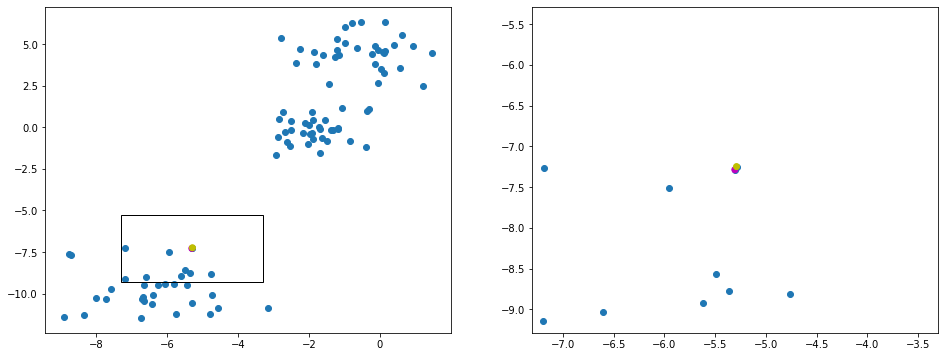

In [273]:
from matplotlib.patches import Rectangle

idxs=closest_points

xmin, ymin, xmax, ymax = *(X[idxs[0]]-2), *(X[idxs[0]]+2)
print(xmin, xmax, ymin, ymax)


plt.figure(figsize=(16,6))
ax =  plt.subplot(121)
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idxs,0], X[idxs,1], c=['m','y'])

w, h = xmax-xmin, ymax-ymin
bb = Rectangle((xmin, ymin), w, h, fill=False)
ax.add_patch(bb)

plt.subplot(122)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idxs,0], X[idxs,1], c=['m','y'])

plt.show()

### Plot a dendrogram

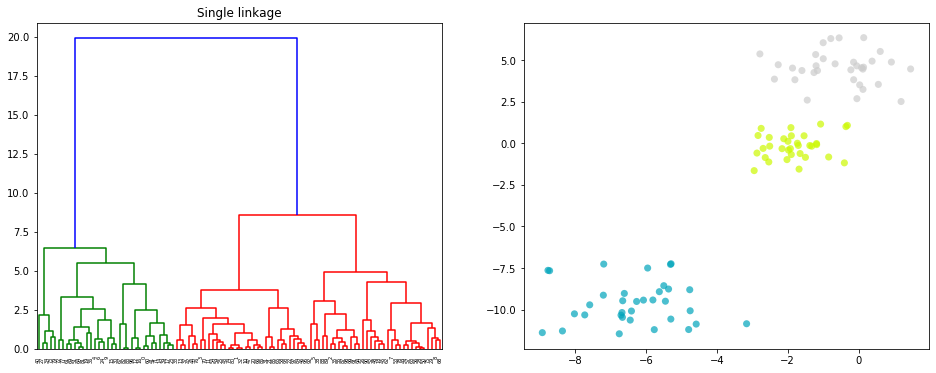

In [274]:
# Plot single linkage
plt.figure(figsize=(16,6))

plt.subplot(121)
hierarchy.dendrogram(Z) # plot dendrogram
plt.title('Single linkage')

plt.subplot(122)
colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / k)
plt.scatter(X[:, 0], X[:, 1], marker='.', s=200, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

# Plot complete linkage
plt.show()

### Problem: What is the distance between strings of letters (e.g. amino acid sequences)?

### Answer: the Levenshtein distance

An algorithm used specifically when the inputs are strings of letters (perfect for DNA or amino acids). We will not delve into the practicalities here, just know that it exists.

In [281]:
# move this to functions.py
# taken from https://www.python-course.eu/levenshtein_distance.php

def levenshtein(s, t, **weight_dict):
    """ 
        iterative_levenshtein(s, t) -> ldist
        ldist is the Levenshtein distance between the strings 
        s and t.
        For all i and j, dist[i,j] will contain the Levenshtein 
        distance between the first i characters of s and the 
        first j characters of t
        
        weight_dict: keyword parameters setting the costs for characters,
                     the default value for a character will be 1
    """

    rows = len(s)+1
    cols = len(t)+1
    
    alphabet = "abcdefghijklmnopqrstuvwxyz"
    w = dict( (x, (1, 1, 1)) for x in alphabet + alphabet.upper())
    if weight_dict:
        w.update(weight_dict)
    
    dist = [[0 for x in range(cols)] for x in range(rows)]

    # source prefixes can be transformed into empty strings 
    # by deletions:
    for row in range(1, rows):
        dist[row][0] = dist[row-1][0] + w[s[row-1]][0]

    # target prefixes can be created from an empty source string
    # by inserting the characters
    for col in range(1, cols):
        dist[0][col] = dist[0][col-1] + w[t[col-1]][1]
        
    for col in range(1, cols):
        for row in range(1, rows):
            deletes = w[s[row-1]][0]
            inserts = w[t[col-1]][1]
            subs = max( (w[s[row-1]][2], w[t[col-1]][2]))
            if s[row-1] == t[col-1]:
                subs = 0
            else:
                subs = subs

            dist[row][col] = min(dist[row-1][col] + deletes,
                                 dist[row][col-1] + inserts,
                                 dist[row-1][col-1] + subs) # substitution

    #for r in range(rows):
    #    print(dist[r])
    
 
    return dist[row][col]

# default:
print(levenshtein("abx", 
                  "xya", 
                  x=(3, 2, 8),
                  y=(4, 5, 4),
                  a=(7, 6, 6)) )

11


### Here we look at a short amino acid sequence found in various represants from phylogenetic groups and apply hierarchical clustering

[0, 1, 2, 3, 4, 5, 6, 7]
[1, 0, 1, 2, 3, 4, 5, 6]
[2, 1, 0, 1, 2, 3, 4, 5]
[3, 2, 1, 0, 1, 2, 3, 4]
[4, 3, 2, 1, 0, 1, 2, 3]
[5, 4, 3, 2, 1, 0, 1, 2]
[6, 5, 4, 3, 2, 1, 0, 1]
[7, 6, 5, 4, 3, 2, 1, 0]
[0, 1, 2, 3, 4, 5, 6, 7]
[1, 0, 1, 2, 3, 4, 5, 6]
[2, 1, 0, 1, 2, 3, 4, 5]
[3, 2, 1, 0, 1, 2, 3, 4]
[4, 3, 2, 1, 1, 2, 3, 4]
[5, 4, 3, 2, 1, 1, 2, 3]
[6, 5, 4, 3, 2, 1, 1, 2]
[7, 6, 5, 4, 3, 2, 1, 1]
[0, 1, 2, 3, 4, 5, 6, 7]
[1, 0, 1, 2, 3, 4, 5, 6]
[2, 1, 1, 2, 2, 3, 4, 5]
[3, 2, 2, 1, 2, 2, 3, 4]
[4, 3, 3, 2, 1, 2, 3, 4]
[5, 4, 4, 3, 2, 2, 2, 3]
[6, 5, 5, 4, 3, 3, 2, 2]
[7, 6, 6, 5, 4, 4, 3, 2]
[0, 1, 2, 3, 4, 5, 6, 7]
[1, 0, 1, 2, 3, 4, 5, 6]
[2, 1, 1, 2, 3, 4, 5, 6]
[3, 2, 2, 1, 2, 3, 4, 5]
[4, 3, 3, 2, 2, 3, 4, 5]
[5, 4, 4, 3, 2, 3, 4, 5]
[6, 5, 5, 4, 3, 3, 4, 5]
[7, 6, 6, 5, 4, 4, 4, 5]
[0, 1, 2, 3, 4, 5, 6, 7]
[1, 0, 1, 2, 3, 4, 5, 6]
[2, 1, 1, 2, 3, 4, 5, 6]
[3, 2, 2, 1, 2, 3, 4, 5]
[4, 3, 3, 2, 2, 3, 4, 5]
[5, 4, 4, 3, 2, 3, 4, 4]
[6, 5, 5, 4, 3, 3, 4, 4]
[7, 6, 6, 5, 4, 4, 4, 4]


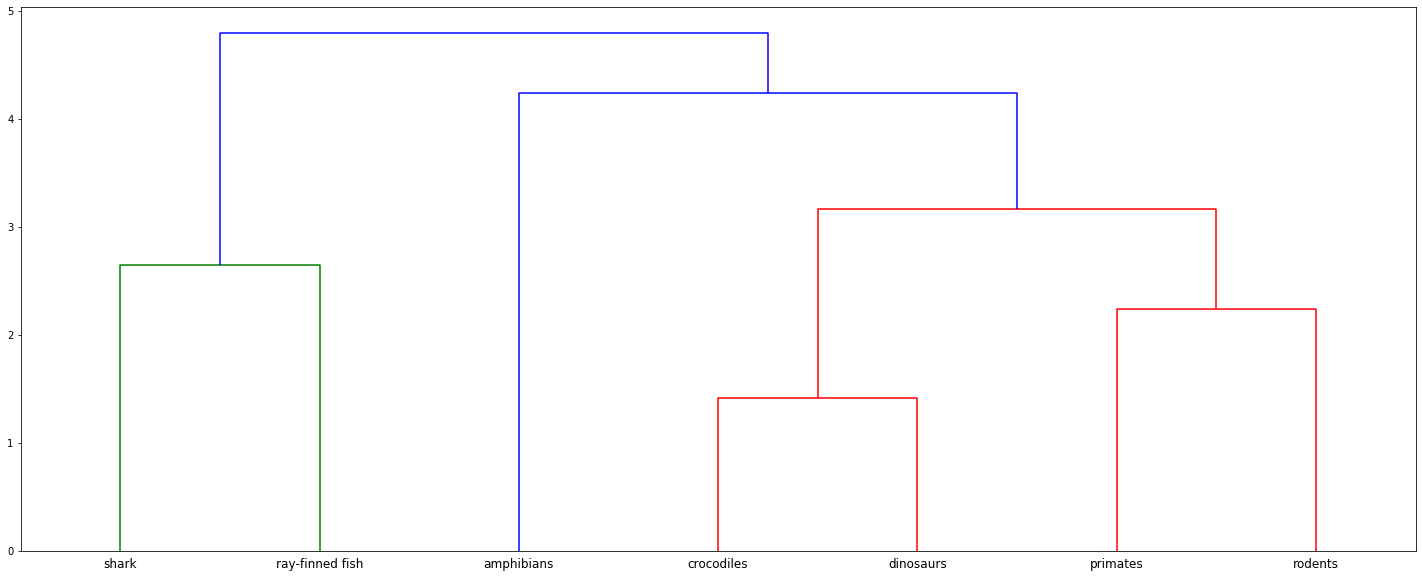

In [283]:
# example taken from INF283 taught at the university of Bergen

data = [ "ATGTAAA" , "ATGAAAA" , "ACGTGAA" , "ACGAGGG" , "ACGAGGA" , "ACGAGTC" , "ACGAGCC" ]
labels = [ "shark" , "ray-finned fish" , "amphibians" , "primates" , "rodents" , "crocodiles" , "dinosaurs" ]

# The levenshtein distance matrix ->
mat = np.zeros(( len (data), len (data)), dtype = int )
for i in range ( 0 , len (data)):
    for j in range ( 0 , len (data)):
        mat[i][j] = iterative_levenshtein(data[i], data[j])
        print (mat[i][j], end = "" )
    print ( " \n " )
mat = pdist(mat) # make an upper triangle matrix

# The hierarchy clustering ->
# here run scipy.cluster.hierarchy.linkage() on triangle matrix
z = hierarchy.linkage(mat)


fig = plt.figure( figsize =( 25 , 10 ))
# here run scipy.cluster.hierarchy.dendrogram() with the linkage z and labels = labels
dn = hierarchy.dendrogram(z, labels=labels)
plt.show()

**Exercise: go to UniProt, and decide upon a particular gene/protein. Find the homologue of this gene in 5-6 various species, and perform hierarchical clustering on it.**

Tip: select a short (5-15) sequence which differs between all the represants.